In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Importing the dataset
dataset = pd.read_csv('Flights.csv')

In [3]:
data = dataset.copy()
data.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
176701,6660,Air_India,AI-805,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,34,2476
151696,88571,SpiceJet,SG-531,Bangalore,Morning,one,Evening,Delhi,Economy,9.42,24,4336
118249,162575,Vistara,UK-898,Hyderabad,Early_Morning,one,Night,Mumbai,Economy,15.75,30,3471
81674,231455,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Bangalore,Business,16.92,18,74365
133980,43035,GO_FIRST,G8-351,Mumbai,Morning,one,Night,Delhi,Economy,13.50,1,5942


In [4]:
# Dropping unnamed, flight, duration columns
data.drop(['Unnamed: 0', 'flight', 'duration'], axis=1, inplace=True)


In [5]:
data.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
48672,Indigo,Mumbai,Morning,one,Afternoon,Delhi,Economy,23,8558
158607,SpiceJet,Delhi,Evening,one,Night,Mumbai,Economy,35,3371
156591,Vistara,Chennai,Night,one,Early_Morning,Hyderabad,Business,8,41064
146822,Air_India,Mumbai,Early_Morning,one,Evening,Chennai,Economy,24,5152
53231,Vistara,Kolkata,Evening,one,Morning,Delhi,Business,33,68303


In [7]:
# Getting unique values in airline, source_city, destination_city, stops, arrival_time, departure_time, class
print(data['airline'].unique())
print(data['source_city'].unique())
print(data['destination_city'].unique())
print(data['stops'].unique())
print(data['arrival_time'].unique())
print(data['departure_time'].unique())
print(data['class'].unique())


['Air_India' 'Indigo' 'AirAsia' 'Vistara' 'SpiceJet' 'GO_FIRST']
['Kolkata' 'Bangalore' 'Mumbai' 'Delhi' 'Hyderabad' 'Chennai']
['Mumbai' 'Kolkata' 'Chennai' 'Hyderabad' 'Delhi' 'Bangalore']
['one' 'zero' 'two_or_more']
['Morning' 'Evening' 'Early_Morning' 'Afternoon' 'Late_Night' 'Night']
['Night' 'Afternoon' 'Morning' 'Early_Morning' 'Evening' 'Late_Night']
['Economy' 'Business']


In [10]:
data.sample(5)


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
43720,Air_India,Delhi,Early_Morning,one,Early_Morning,Hyderabad,Economy,34,4524
155692,Air_India,Chennai,Night,one,Evening,Mumbai,Business,33,49553
105424,Vistara,Chennai,Early_Morning,one,Evening,Kolkata,Business,7,54896
119438,Vistara,Bangalore,Evening,one,Late_Night,Delhi,Economy,44,4111
16718,Indigo,Chennai,Morning,zero,Morning,Mumbai,Economy,32,3572


In [11]:
#Manually encoding the categorical variables

#Available airlines - 'Air_India' 'Indigo' 'AirAsia' 'Vistara' 'SpiceJet' 'GO_FIRST'
#Available source cities - 'Kolkata' 'Bangalore' 'Mumbai' 'Delhi' 'Hyderabad' 'Chennai'
#Available destination cities - 'Bangalore' 'Mumbai' 'Delhi' 'Hyderabad' 'Chennai' 'Kolkata'
#Available stops - 'zero' 'one' 'two_or_more'
#Available arrival times - 'Morning' 'Evening' 'Early_Morning' 'Afternoon' 'Late_Night' 'Night'
#Available departure times - 'Morning' 'Evening' 'Early_Morning' 'Afternoon' 'Late_Night' 'Night'
#Available classes - 'Economy' 'Business'

data['airline'] = data['airline'].map({'Air_India':0, 'Indigo':1, 'AirAsia':2, 'Vistara':3, 'SpiceJet':4, 'GO_FIRST':5})
data['source_city'] = data['source_city'].map({'Kolkata':0, 'Bangalore':1, 'Mumbai':2, 'Delhi':3, 'Hyderabad':4, 'Chennai':5})
data['destination_city'] = data['destination_city'].map({'Bangalore':0, 'Mumbai':1, 'Delhi':2, 'Hyderabad':3, 'Chennai':4, 'Kolkata':5})
data['stops'] = data['stops'].map({'zero':0, 'one':1, 'two_or_more':2})
data['arrival_time'] = data['arrival_time'].map({'Morning':0, 'Evening':1, 'Early_Morning':2, 'Afternoon':3, 'Late_Night':4, 'Night':5})
data['departure_time'] = data['departure_time'].map({'Morning':0, 'Evening':1, 'Early_Morning':2, 'Afternoon':3, 'Late_Night':4, 'Night':5})
data['class'] = data['class'].map({'Economy':0, 'Business':1})


In [12]:
data.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
9360,3,4,5,1,5,4,1,24,41314
145839,3,1,1,1,5,3,0,4,7813
189802,3,0,2,1,1,0,1,19,60978
129408,3,1,1,0,5,1,0,42,2150
108026,0,1,3,1,0,1,0,31,5771


In [13]:
x = data.drop('price', axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [16]:
#Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

important = ExtraTreesRegressor()
important.fit(x_train, y_train)

ExtraTreesRegressor()

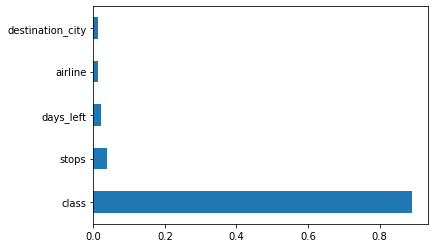

In [17]:
from pyexpat import features


features = pd.Series(important.feature_importances_, index=x.columns)
features.nlargest().plot(kind='barh')
plt.show()

In [18]:
#linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9044674126386911

In [19]:
#Saving the model
import pickle
file = open('linear.pkl', 'wb')

In [22]:
#XGBoost
import xgboost
regressor = xgboost.XGBRegressor()
regressor.fit(x_train, y_train)


#Saving the model
file = open('xgboost.pkl', 'wb')

regressor.score(x_test, y_test)


0.968029301020274

In [23]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(x_train, y_train)


#Saving the model
file = open('random_forest.pkl', 'wb')

rf.score(x_test, y_test)

0.96236486246556

In [28]:
#Testing the model

#Airline - Air_India
#Source_city - Kolkata
#Destination_city - Bangalore
#Stops - zero
#Arrival_time - Morning
#Departure_time - Morning
#Class - Economy
#Days left - 10

#print(model.predict([[1, 2, 1, 0, 0, 1, 1, 10]]))

#using the saved model to predict the price for user input
model = pickle.load(open('random_forest.pkl', 'rb'))
print(model.predict([[1, 2, 1, 0, 0, 1, 1, 10]]))


EOFError: Ran out of input